In [1]:
# import all required libraries
import cv2 
import numpy as np 
from  google.colab.patches import cv2_imshow

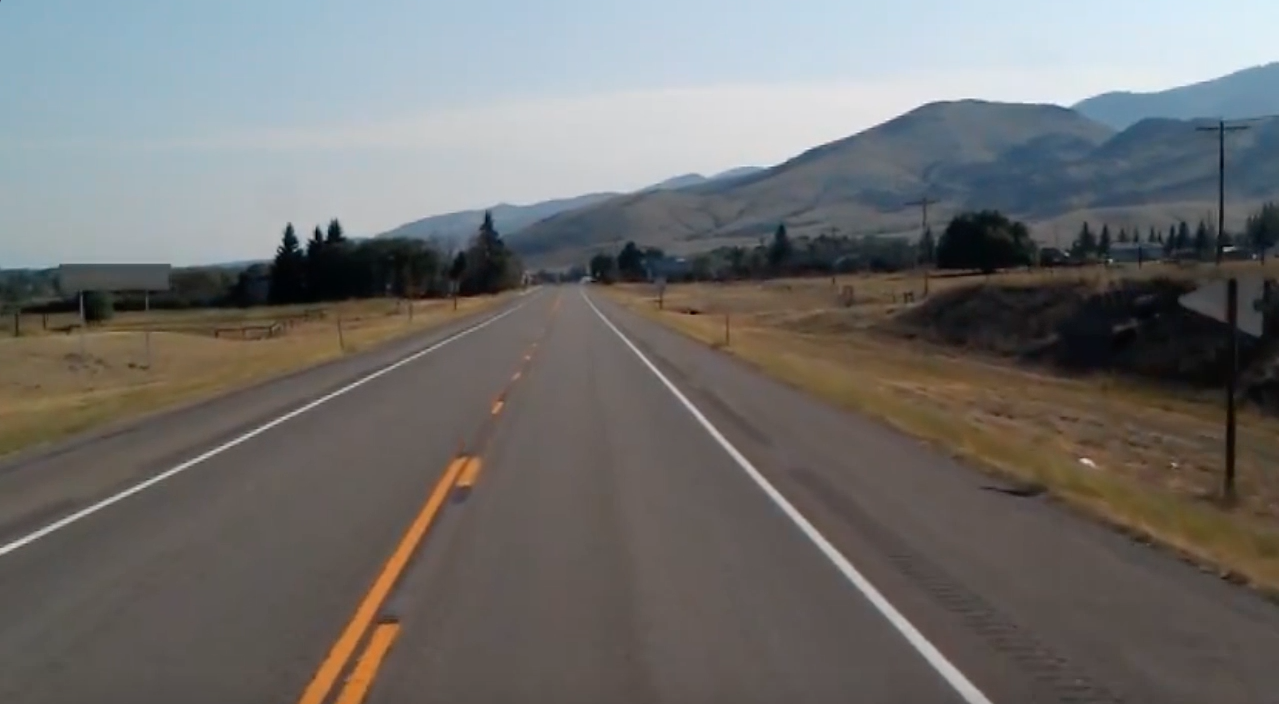

In [2]:
image= cv2.imread('/content/test_image.jpg')
cv2_imshow(image)

## convert the original image to gray scale image 

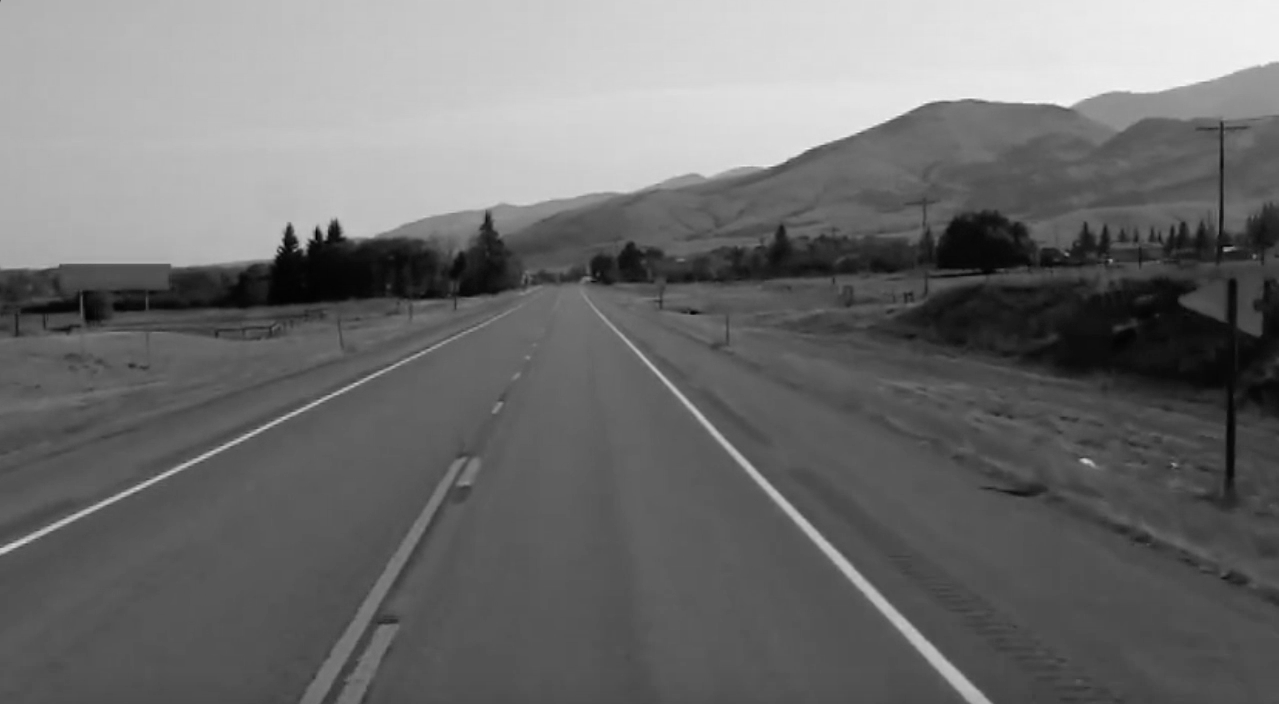

In [3]:
roadlaneimage=np.copy(image)
grayscaleimage=cv2.cvtColor(roadlaneimage,cv2.COLOR_RGB2GRAY)#cv2.cvtColor() method is used to convert an image from one color space to another.
cv2_imshow(grayscaleimage)

smoothing on the top of grayscale

Important types of blurring:

Gaussian Blurring:Gaussian blur is the result of blurring an image by a Gaussian function. It is a widely used effect in graphics software, typically to reduce image noise and reduce detail. It is also used as a preprocessing stage before applying our machine learning or deep learning models.
E.g. of a Gaussian kernel(3×3)
  1/16 \quad \begin{bmatrix} 1 & 2 & 1 \\ 2 & 4 & 2\\ 1 & 2 & 1 \\  \end{bmatrix}  
Median Blur: The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise. It is one of the best algorithms to remove Salt and pepper noise.
Bilateral Blur:

 A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.


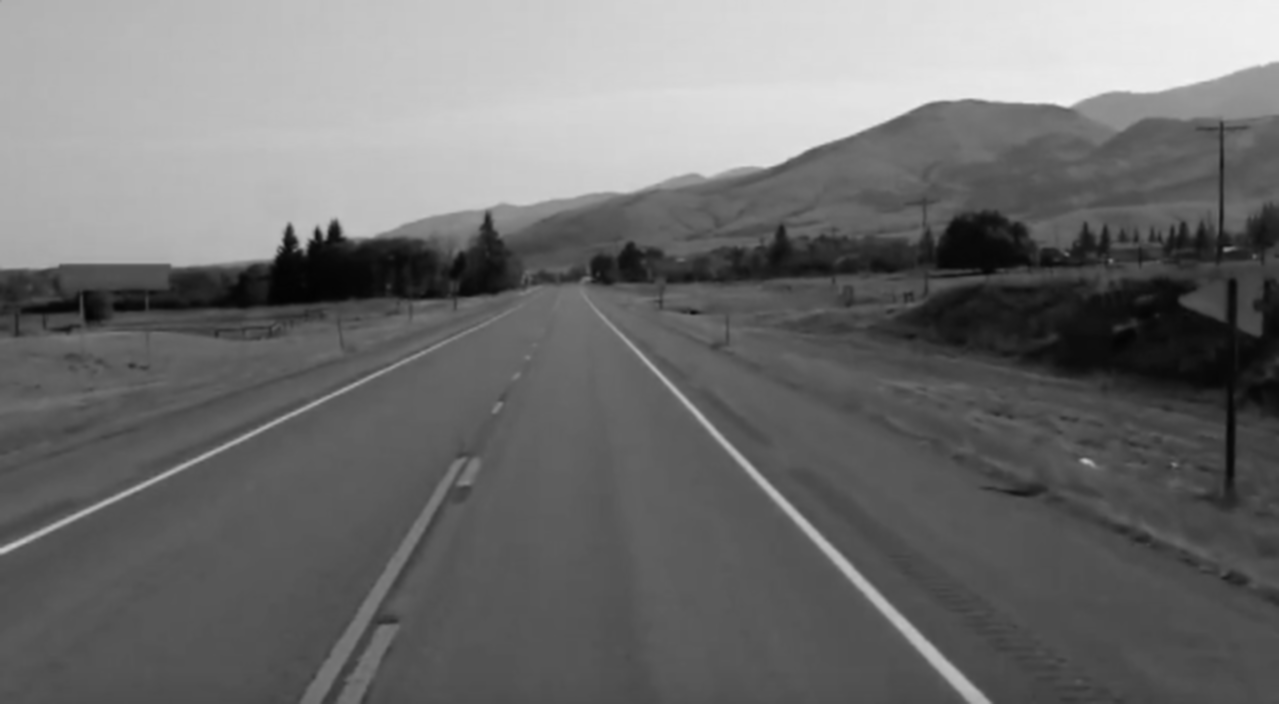

In [4]:
blur = cv2.GaussianBlur(grayscaleimage,(5,5),0)
cv2_imshow(blur)

*Canny Edge Detection Algorithm : Identify the edges where sharp change in intensity happened which is also known as strong gradient*

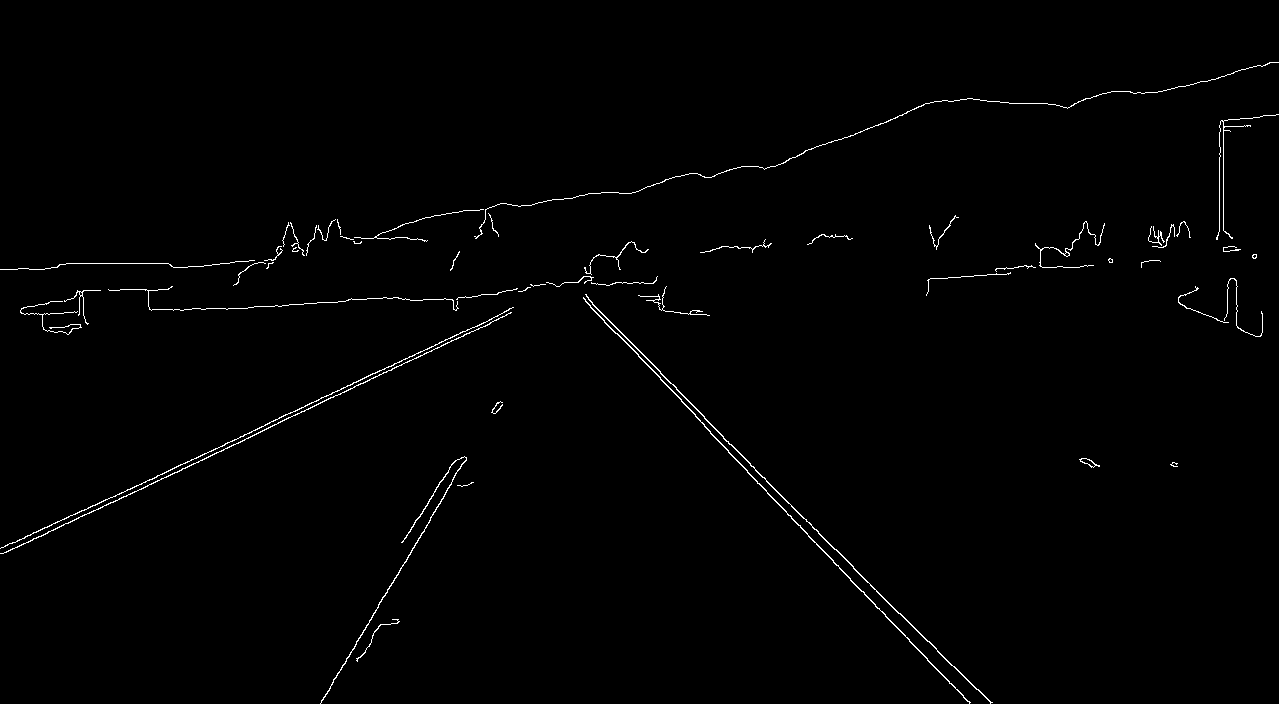

canny pixel [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [5]:
minthreshold=50
maxthreshlod=150
canny = cv2.Canny(blur , minthreshold,maxthreshlod)
cv2_imshow(canny)
print('canny pixel', canny)


In [6]:
canny.shape

(704, 1279)

Region of interest


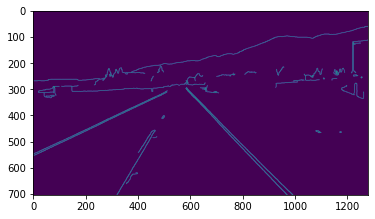

In [7]:
import matplotlib.pyplot as plt
plt.imshow(canny)
plt.show()

In [13]:
def regionofinterest(image):
  height=image.shape[0]
  polygon= np.array([
      [(0,550),(1100,height),(550,250)]
  ])
  mask=np.zeros_like(image)
  print('mask data', mask)
  cv2.fillPoly(mask,polygon,255)
  masked_image=cv2.bitwise_and(image,mask)
  return masked_image

croped_image=regionofinterest(canny)

mask data [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


finding the lane line  using hough transformation 

In [14]:
def display_image(image,lines):
   ## line_images is black image
  ## Dimension is same as the original image
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
        #print(line)
      x1, y1, x2, y2 = line.reshape(4)
      #print(x1)
      ## (255, 0, 0) = (Blue, Green, Red) 
      ## 10 = line thickness
      cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
  return line_image


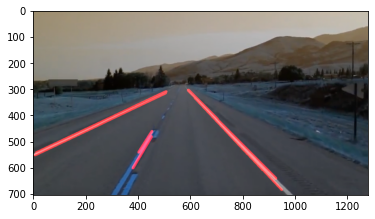

In [15]:
# we writing this value manually but their are so many algorithm 
# for hyperparameter
# Define the Hough transform parameters
# Make a blank the same size as our image to draw on

rho= 2 # distance resolution in pixels of the Hough grid - 1
theta=np.pi/100 # angular resolution in radians of the Hough grid
threshold =100  # minimum number of votes (intersections in Hough grid cell) - 2
min_line_lenght=40 # minimum number of pixels making up a line - 40
max_line_gap=5 # maximum gap in pixels between connectable line segments
line_image= np.copy(image)*0 # creating a blank to draw lines on

lines = cv2.HoughLinesP(croped_image, rho, theta,threshold , np.array([]), min_line_lenght , max_line_gap) # this function give us the detected lines
# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
  for x1,y1,x2,y2 in line:
    cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
# Create a "color" binary image to combine with line image
line_image=display_image(roadlaneimage,lines)
# Draw the lines on the edge image
## Blending the two images with a given threshold value
lines_edges = cv2.addWeighted(roadlaneimage, 0.8, line_image, 1, 1)
plt.imshow(lines_edges)
plt.show()

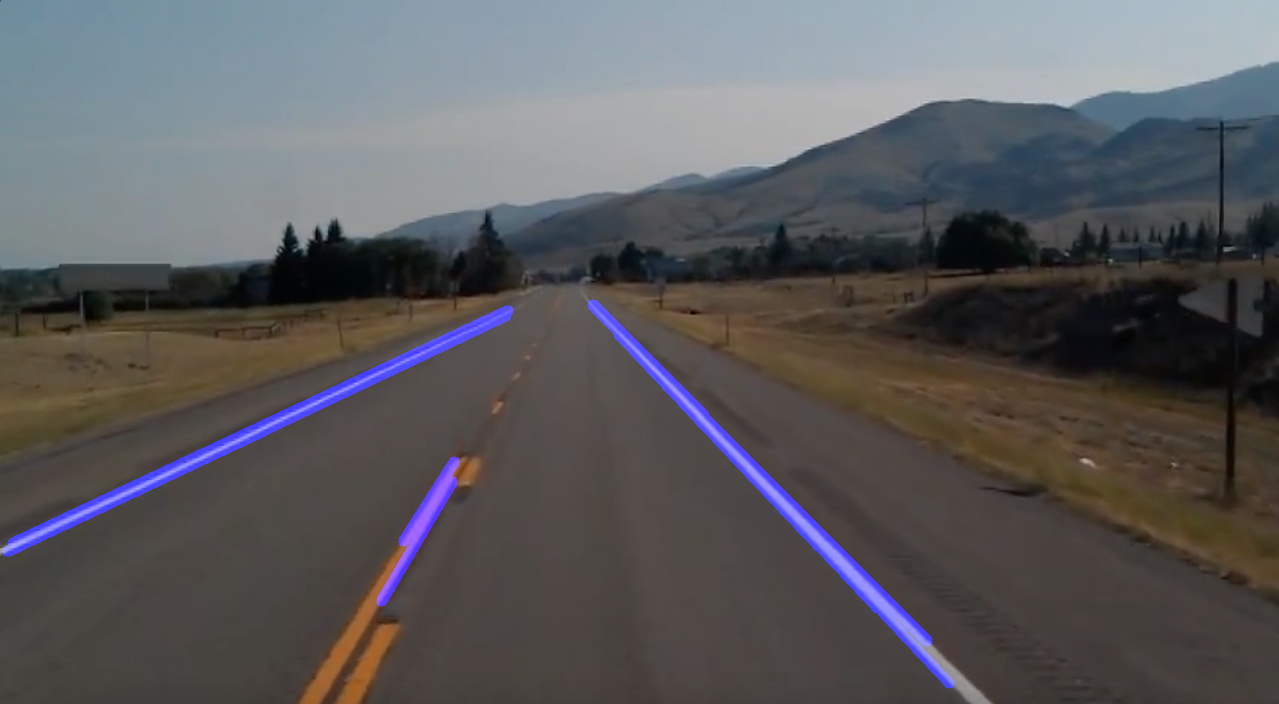

In [16]:
cv2_imshow(lines_edges)